- Fazer o membership do Abell 168 e 
- Salvar as figuras numa pasta à parte
- Precisa dos photo-zs do S-PLUS (arquivo que o Erik mandou) + dados do DECaLS pra poder fazer a separação estrela-galáxia 


- O Erik mandou uma tabela com os dados dos objetos dentro de 5R200 dos dois aglomerados ("A3128+3158.csv");
- Informações sobre os aglomerados, como raios etc., tão no arquivo "info_cls_shiftgap_iter_10.0hmpcf_nrb.csv"

### Load packages

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy.coordinates import SkyCoord
from astropy.visualization.wcsaxes import SphericalCircle
import astropy.units as u

In [2]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=71, Om0=0.27, Tcmb0=2.725)

In [3]:
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import rc, rcParams
f = 0.8

fontsize = 35 * f
labelsize = 35 * f

rc("xtick", labelsize=fontsize * f)
rc("ytick", labelsize=fontsize * f)
rcParams["axes.linewidth"] = 5.3 * f
rcParams["xtick.major.width"] = 5.3 * f
rcParams["xtick.minor.width"] = 5.3 * f
rcParams["ytick.major.width"] = 5.3 * f
rcParams["ytick.minor.width"] = 5.3 * f
rcParams["xtick.major.size"] = 12.5 * f
rcParams["xtick.minor.size"] = 6.5 * f
rcParams["ytick.major.size"] = 12.5 * f
rcParams["ytick.minor.size"] = 6.5 * f

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 50 * f,
        }


cm1 = plt.cm.get_cmap('jet')
cm2 = plt.cm.get_cmap('rainbow')
cm3 = plt.cm.get_cmap('gnuplot2')

color_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colors1 = [cm1(value) for value in color_values]
colors3 = [cm3(value) for value in color_values]

## Familiarization with data

### Legacy

In [4]:
table_path_a168_legacy = "A168+leg.parquet"
table_path_a3158_legacy = "A3158+leg.parquet"

In [5]:
table_a168_legacy = pd.read_parquet(table_path_a168_legacy)
table_a3158_legacy = pd.read_parquet(table_path_a3158_legacy)

In [6]:
table_a168_legacy.to_csv("A168_legacy.csv", index=False)

In [8]:
table_a3158_legacy.to_csv("A3158_legacy.csv", index=False)

In [10]:
ra_a168_legacy = table_a168_legacy["ra"]
dec_a168_legacy = table_a168_legacy["dec"]
type_a168_legacy = table_a168_legacy["type"]
mag_r_a168_legacy = table_a168_legacy["mag_r"]

ra_a3158_legacy = table_a3158_legacy["ra"]
dec_a3158_legacy = table_a3158_legacy["dec"]
type_a3158_legacy = table_a3158_legacy["type"]
mag_r_a3158_legacy = table_a3158_legacy["mag_r"]

In [11]:
mask_galaxies_a168 = (type_a168_legacy != "PSF") & (type_a168_legacy != "DUP")
mask_galaxies_a3158 = (type_a3158_legacy != "PSF") & (type_a3158_legacy != "DUP")

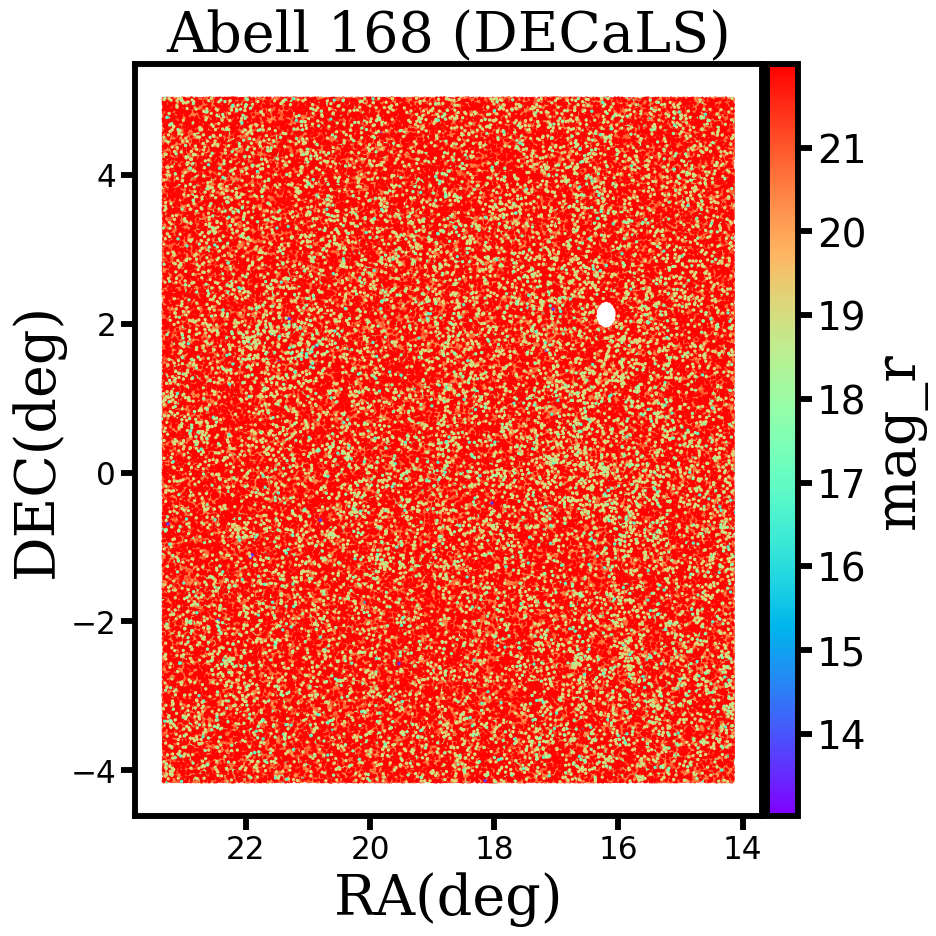

In [7]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(111)
sc1 = ax1.scatter(ra_a168_legacy[mask_galaxies_a168], dec_a168_legacy[mask_galaxies_a168], 
            marker='o', c=mag_r_a168_legacy[mask_galaxies_a168], cmap=cm2, s=2)
# ax1.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center")
ax1.set_xlabel('RA(deg)',fontdict=font)
ax1.set_ylabel('DEC(deg)',fontdict=font)
ax1.invert_xaxis()
ax1.set_title("Abell 168 (DECaLS)", fontdict=font)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="mag_r", fontdict=font)
cbar.ax.tick_params(labelsize=labelsize)

# c0 = SkyCoord(ra=ra0, dec=dec0, frame='icrs', unit='deg')
# r = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
#             lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
# ax1.add_patch(r)

# ax1.legend(fontsize=labelsize)

fig.tight_layout(pad=3.0)

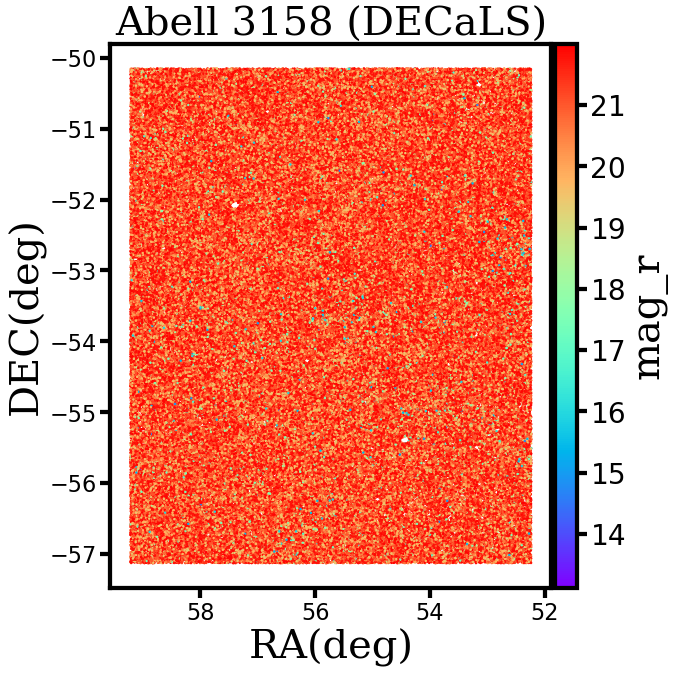

In [12]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(111)
sc1 = ax1.scatter(ra_a3158_legacy[mask_galaxies_a3158], dec_a3158_legacy[mask_galaxies_a3158], 
            marker='o', c=mag_r_a3158_legacy[mask_galaxies_a3158], cmap=cm2, s=2)
# ax1.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center")
ax1.set_xlabel('RA(deg)',fontdict=font)
ax1.set_ylabel('DEC(deg)',fontdict=font)
ax1.invert_xaxis()
ax1.set_title("Abell 3158 (DECaLS)", fontdict=font)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="mag_r", fontdict=font)
cbar.ax.tick_params(labelsize=labelsize)

# c0 = SkyCoord(ra=ra0, dec=dec0, frame='icrs', unit='deg')
# r = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
#             lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
# ax1.add_patch(r)

# ax1.legend(fontsize=labelsize)

fig.tight_layout(pad=3.0)

### S-PLUS

In [114]:
table_path_a168_splus = "A168_splus.csv"
# table_path_ymv_splus= "YMV2007-2116_splus.csv"

In [118]:
table_a168_splus = pd.read_csv(table_path_a168_splus, usecols=["ID", "RA", "DEC", "zml", "r_aper_6", "remove_flag"])
# table_ymv_splus = pd.read_csv(table_path_ymv_splus, usecols=["RA", "DEC", "zml", "r_aper_6", "remove_flag"])

In [126]:
table_a168_splus["ID"].str[6:-8].str.replace("_0_", "").unique()

array(['STRIPE82-0030', 'STRIPE82_0029', 'STRIPE82-0028', '_A147-005',
       'STRIPE82-0027', 'STRIPE82_0025', '_A147-002', 'STRIPE82_0026'],
      dtype=object)

In [9]:
ra_a168_splus = table_a168_splus["RA"]
dec_a168_splus = table_a168_splus["DEC"]
zml_a168_splus = table_a168_splus["zml"]
raper6_a168_splus = table_a168_splus["r_aper_6"]
remove_flag_a168_splus = table_a168_splus["remove_flag"]

ra_ymv_splus = table_ymv_splus["RA"]
dec_ymv_splus = table_ymv_splus["DEC"]
zml_ymv_splus = table_ymv_splus["zml"]
raper6_ymv_splus = table_ymv_splus["r_aper_6"]
remove_flag_ymv_splus = table_ymv_splus["remove_flag"]

In [10]:
mask_splus_a168 = (remove_flag_a168_splus == False) & (raper6_a168_splus < 90)
mask_splus_ymv = (remove_flag_ymv_splus == False) & (raper6_ymv_splus < 90)

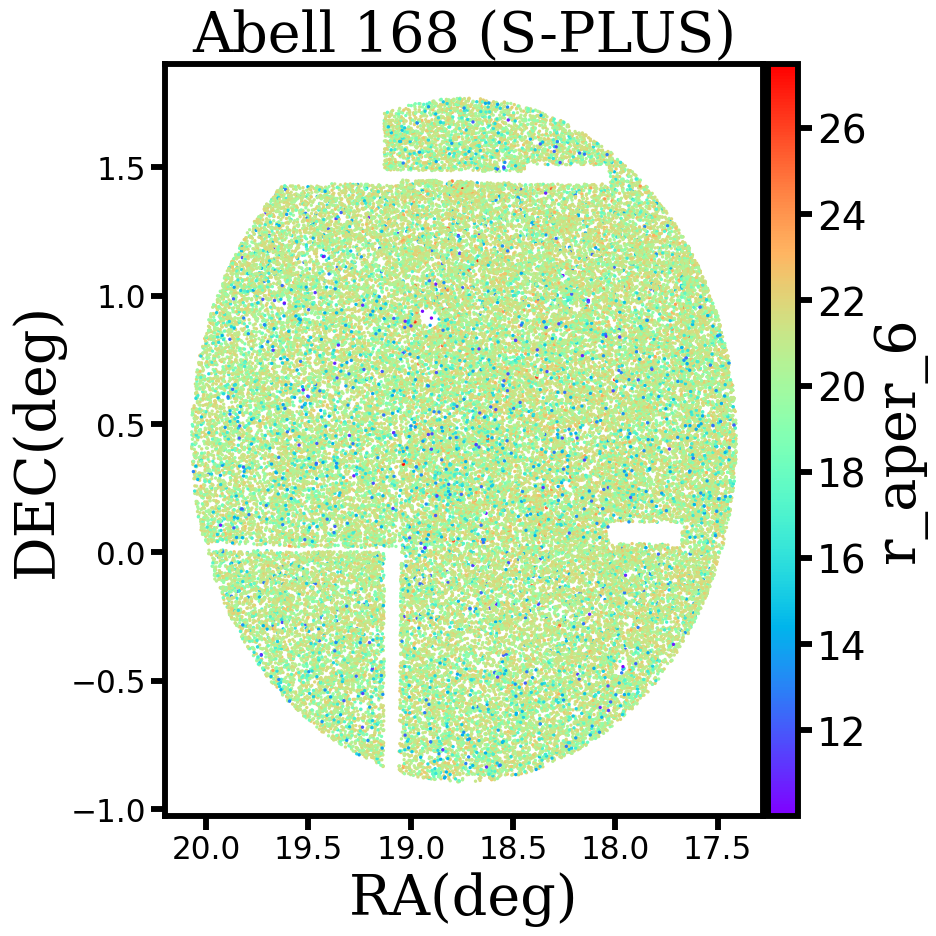

In [11]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(111)
sc1 = ax1.scatter(ra_a168_splus[mask_splus_a168], dec_a168_splus[mask_splus_a168], 
            marker='o', c=raper6_a168_splus[mask_splus_a168], cmap=cm2, s=2)
# ax1.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center")
ax1.set_xlabel('RA(deg)',fontdict=font)
ax1.set_ylabel('DEC(deg)',fontdict=font)
ax1.invert_xaxis()
ax1.set_title("Abell 168 (S-PLUS)", fontdict=font)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="r_aper_6", fontdict=font)
cbar.ax.tick_params(labelsize=labelsize)

# c0 = SkyCoord(ra=ra0, dec=dec0, frame='icrs', unit='deg')
# r = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
#             lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
# ax1.add_patch(r)

# ax1.legend(fontsize=labelsize)

fig.tight_layout(pad=3.0)

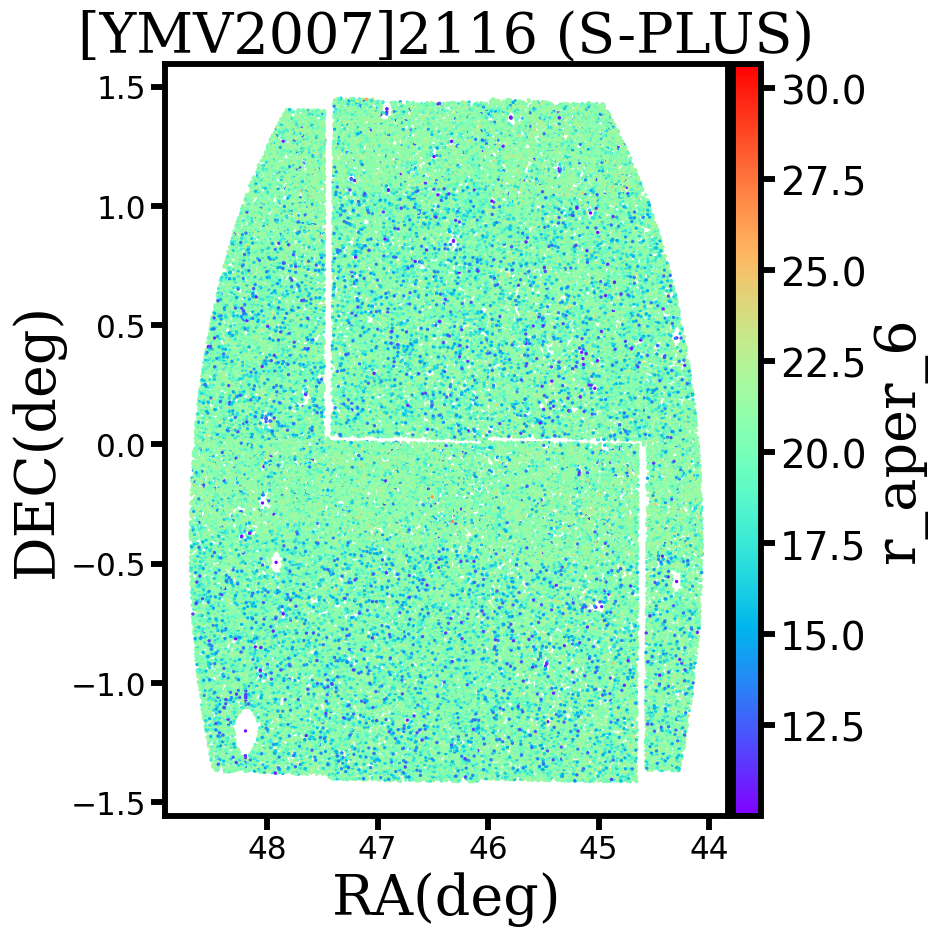

In [18]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(111)
sc1 = ax1.scatter(ra_ymv_splus[mask_splus_ymv], dec_ymv_splus[mask_splus_ymv], 
            marker='o', c=raper6_ymv_splus[mask_splus_ymv], cmap=cm2, s=2)
# ax1.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center")
ax1.set_xlabel('RA(deg)',fontdict=font)
ax1.set_ylabel('DEC(deg)',fontdict=font)
ax1.invert_xaxis()
ax1.set_title("[YMV2007]2116 (S-PLUS)", fontdict=font)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="r_aper_6", fontdict=font)
cbar.ax.tick_params(labelsize=labelsize)

# c0 = SkyCoord(ra=ra0, dec=dec0, frame='icrs', unit='deg')
# r = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
#             lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
# ax1.add_patch(r)

# ax1.legend(fontsize=labelsize)

fig.tight_layout(pad=3.0)

### Crossmatched samples

In [40]:
def crossmatch_catalogues(ra1, dec1, ra2, dec2, radius):
    c1 = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
    c2 = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)

    max_sep = radius * u.arcsec
    idx, d2d, d3d = c1.match_to_catalog_sky(c2)
    sep_constraint = d2d < max_sep
    c1_matches = c1[sep_constraint]
    c2_matches = c2[idx[sep_constraint]]
    
    return c1_matches, c2_matches

In [ ]:
#This crossmatch is not working for some reason. I decided to make the crossmatch on TOPCAT.
a168_crossmatch = crossmatch_catalogues(np.asarray(ra_a168_legacy[mask_galaxies_a168]), 
                             np.asarray(dec_a168_legacy[mask_galaxies_a168]),
                             np.asarray(ra_a168_splus[mask_splus_a168]),
                             np.asarray(dec_a168_splus[mask_splus_a168]),
                             radius=2.0)

I did the crossmatch on TOPCAT, using 2 arcsecs for the crossmatch radius. Table names:
 - "a168_legacy_splus_crossmatch.csv"
 - "YMV2007-2116_legacy_splus_crossmatch.csv"
 
 We also have to do a crossmatch with the Spectroscopic_Catalogue (I used 2 arcsecs as well). Resulting table names:
 
 - a168_legacy_splus_specz_crossmatch.csv
 - YMV2007-2116_legacy_splus_specz_crossmatch.csv

### Define cluster data

In [4]:
#Information based on the table of the paper draft (https://www.overleaf.com/4958173787sbwbtsgjzbch#c79586)

cl_names = np.array(["Abell 168", "Abell 3158"])
cl_ra = np.array([18.740487, 55.727288])
cl_dec = np.array([0.437564, -53.640609])
cl_z = np.array([0.044596, 0.0597])
cl_radii_kpc = np.array([0.869956, 2.054871])*1000 #kpc

In [5]:
cl_radii_deg = []
for zi, i in zip(cl_z, range(len(cl_z))):
    kpc_scale = cosmo.kpc_proper_per_arcmin(z=zi).value/60.
    radius_deg = cl_radii_kpc[i] / (kpc_scale * 3600) #Convert radius from kpc to deg
    cl_radii_deg.append(radius_deg)
    
cl_radii_deg = np.asarray(cl_radii_deg)

In [21]:
cluster = 0

radius_cluster = cl_radii_deg[cluster]
z_cluster = cl_z[cluster]
ra0 = cl_ra[cluster]
dec0 = cl_dec[cluster]

In [22]:
#Por enquanto estou usando o r_aper_6, mas é porque só tenho r_aper_3 e r_aper_6 nessa tabela do A168.
col_names = ['ID', 'RA_1', 'DEC_1', 'zml', 'pdf_weights_0', 'pdf_weights_1', 'pdf_weights_2', 'pdf_weights_3',
       'pdf_weights_4', 'pdf_weights_5', 'pdf_weights_6', 'pdf_means_0',
       'pdf_means_1', 'pdf_means_2', 'pdf_means_3', 'pdf_means_4',
       'pdf_means_5', 'pdf_means_6', 'pdf_stds_0', 'pdf_stds_1', 'pdf_stds_2',
       'pdf_stds_3', 'pdf_stds_4', 'pdf_stds_5', 'pdf_stds_6', 'r_aper_6']

In [23]:
if cl_names[cluster] == "Abell 168":
    t = pd.read_csv("a168_legacy_splus_crossmatch.csv", usecols=col_names)
    t_specz = pd.read_csv("a168_legacy_splus_specz_crossmatch.csv", usecols=col_names+["z"])
    
if cl_names[cluster] == "Abell 3158":
    t = pd.read_csv("YMV2007-2116_legacy_splus_crossmatch.csv")
    t_specz = pd.read_csv("YMV2007-2116_legacy_splus_specz_crossmatch.csv", usecols=col_names+["z"])
    
objid = np.asarray(t["ID"])
ra = np.asarray(t["RA_1"])
dec = np.asarray(t["DEC_1"])
zml = np.asarray(t["zml"])
pdf_weights = np.array([t[col_name] for col_name in ["pdf_weights_" + str(i) for i in range(0, 7)]])
pdf_means = np.array([t[col_name] for col_name in ["pdf_means_" + str(i) for i in range(0, 7)]])
pdf_stds = np.array([t[col_name] for col_name in ["pdf_stds_" + str(i) for i in range(0, 7)]])
raper6 = np.asarray(t["r_aper_6"])

objid_specz = np.asarray(t_specz["ID"])
ra_specz = np.asarray(t_specz["RA_1"])
dec_specz = np.asarray(t_specz["DEC_1"])
zml_specz = np.asarray(t_specz["zml"])
pdf_weights_specz = np.array([t_specz[col_name] for col_name in ["pdf_weights_" + str(i) for i in range(0, 7)]])
pdf_means_specz = np.array([t_specz[col_name] for col_name in ["pdf_means_" + str(i) for i in range(0, 7)]])
pdf_stds_specz = np.array([t_specz[col_name] for col_name in ["pdf_stds_" + str(i) for i in range(0, 7)]])
raper6_specz = np.asarray(t_specz["r_aper_6"])
z = np.asarray(t_specz["z"])

### Spectroscopic data

## Perform the membership

[ 1.76886212e-04 -8.07438409e-03  1.23970821e-01 -6.33901493e-01]


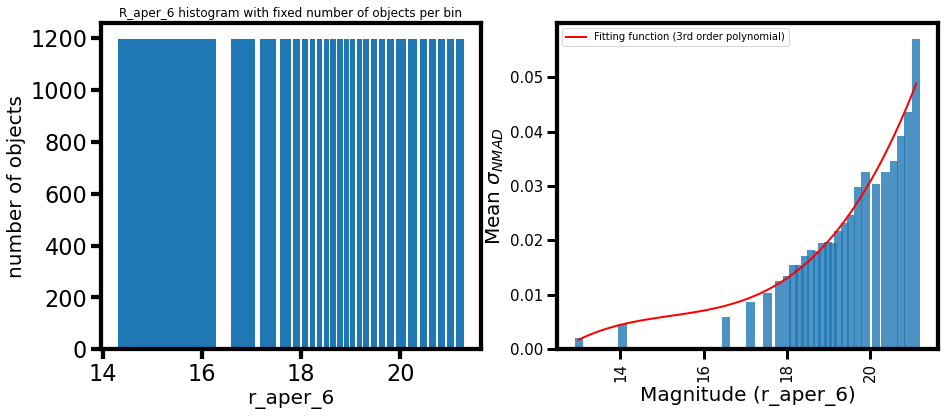

In [9]:
from galaxy_cluster_membership import *

In [177]:
#I define a range of spectroscopic redshifts previously to the application of the membership to diminish the numer
#of objects in the computation. We have to apply a safe margin to not eliminate potential cluster members

#redshift_range de 0.1 é o dobro do valor do sigma_nmad em magnitudes r ~21, então já tá mais que bom.

redshift_range = 0.7
mask_redshift = (zml > (z_cluster - redshift_range)) & (zml < (z_cluster + redshift_range))
mask_redshift_specz = (zml_specz > (z_cluster - redshift_range)) & (zml_specz < (z_cluster + redshift_range))

### Inspecting the clusters (spectroscopic)

In [178]:
sep_specz = clustercentric_distance(ra_specz[mask_redshift_specz], dec_specz[mask_redshift_specz], 
                                    ra0, dec0)

In [179]:
mask_cluster_specz = sep_specz < 5*radius_cluster

sigma_z_specz = np.array([sigma_nmad(r) for r in raper6_specz[mask_redshift_specz][mask_cluster_specz]])
sigma_specz = np.median(sigma_z_specz)

z_lower_specz = z_cluster-3*sigma_specz
z_upper_specz = z_cluster+3*sigma_specz

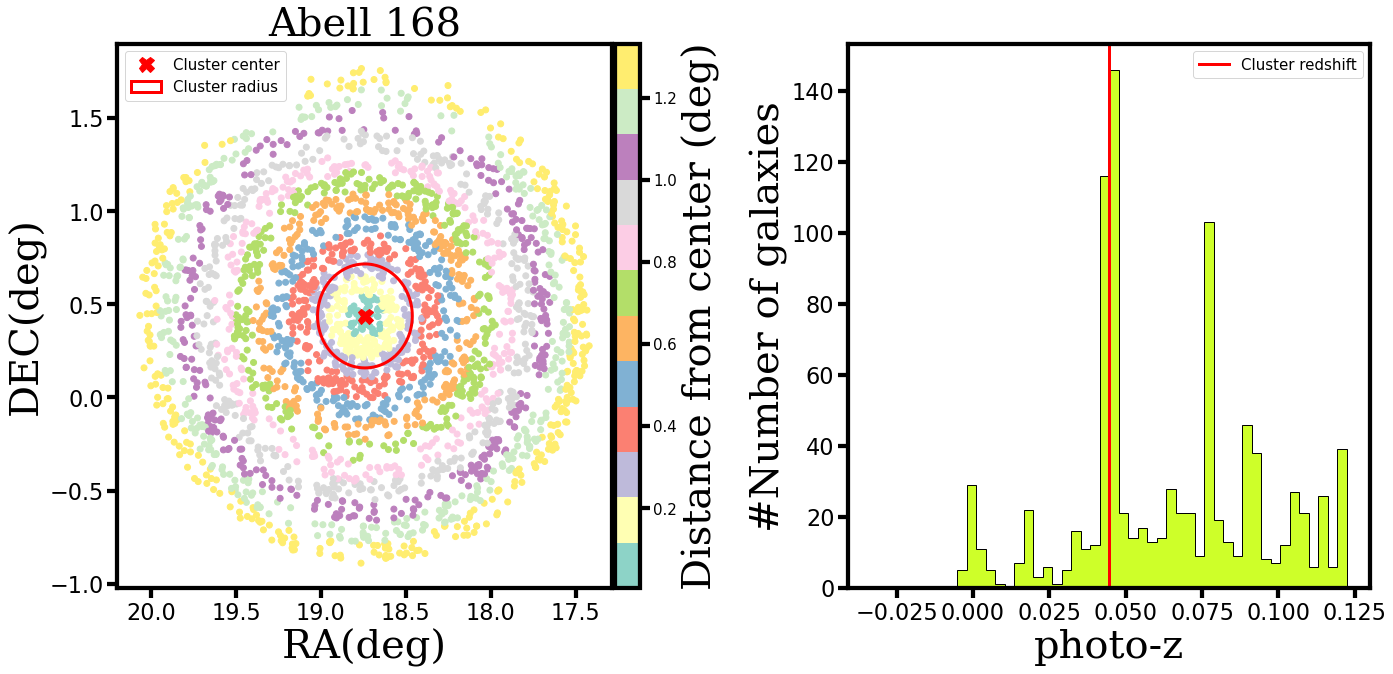

In [180]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
sc1 = ax1.scatter(ra_specz[mask_redshift_specz][mask_cluster_specz], 
                  dec_specz[mask_redshift_specz][mask_cluster_specz], 
                  marker='o', c=sep_specz[mask_cluster_specz], cmap=cm.Set3, rasterized=True)
ax1.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center")
ax1.set_xlabel('RA(deg)',fontdict=font)
ax1.set_ylabel('DEC(deg)',fontdict=font)
ax1.invert_xaxis()
ax1.set_title(cl_names[cluster], fontdict=font)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="Distance from center (deg)", fontdict=font)
cbar.ax.tick_params(labelsize=labelsize)

c0 = SkyCoord(ra=ra0, dec=dec0, frame='icrs', unit='deg')
r = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
            lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
ax1.add_patch(r)

ax1.legend(fontsize=labelsize)


ax2 = fig.add_subplot(122)
ax2.hist(z[mask_redshift_specz][mask_cluster_specz], bins=50, color=colors1[5], histtype='stepfilled', edgecolor='k', 
                 range=[z_lower_specz, z_upper_specz])
ax2.set_xlabel('photo-z',fontdict=font)
ax2.set_ylabel('#Number of galaxies',fontdict=font)
ax2.axvline(z_cluster, color="red", lw=3, label="Cluster redshift")

ax2.legend(fontsize=labelsize)


fig.tight_layout(pad=3.0)

# plt.savefig("figures/RA_DEC_z_distribution_{}.pdf".format(cl_names[cluster]), dpi='figure', format='pdf')

### Inspecting the clusters (photometric)

In [181]:
sep_all = clustercentric_distance(ra[mask_redshift], dec[mask_redshift], ra0, dec0)

In [182]:
mask_cluster = sep_all < 5*radius_cluster

sigma_z = np.array([sigma_nmad(r) for r in raper6[mask_redshift][mask_cluster]])
sigma = np.median(sigma_z)

#Em alguns aglomerados dá pra definir desse jeito mais "automático", mas em alguns o sigma_clipping não funciona direito quando eu seto o z_lower e z_upper desse jeito.
#Por exemplo, pode ser que eu acabe selecionando um intervalo muito grande de redshifts e aí o sigma_clipping não funciona bem em alguns aglomerados
#Então nesses casos tenho que ajustar uns valores aqui à mão.
# z_lower = z_cluster-3*sigma
# z_upper = z_cluster+3*sigma

z_lower = 0.035
z_upper = 0.055

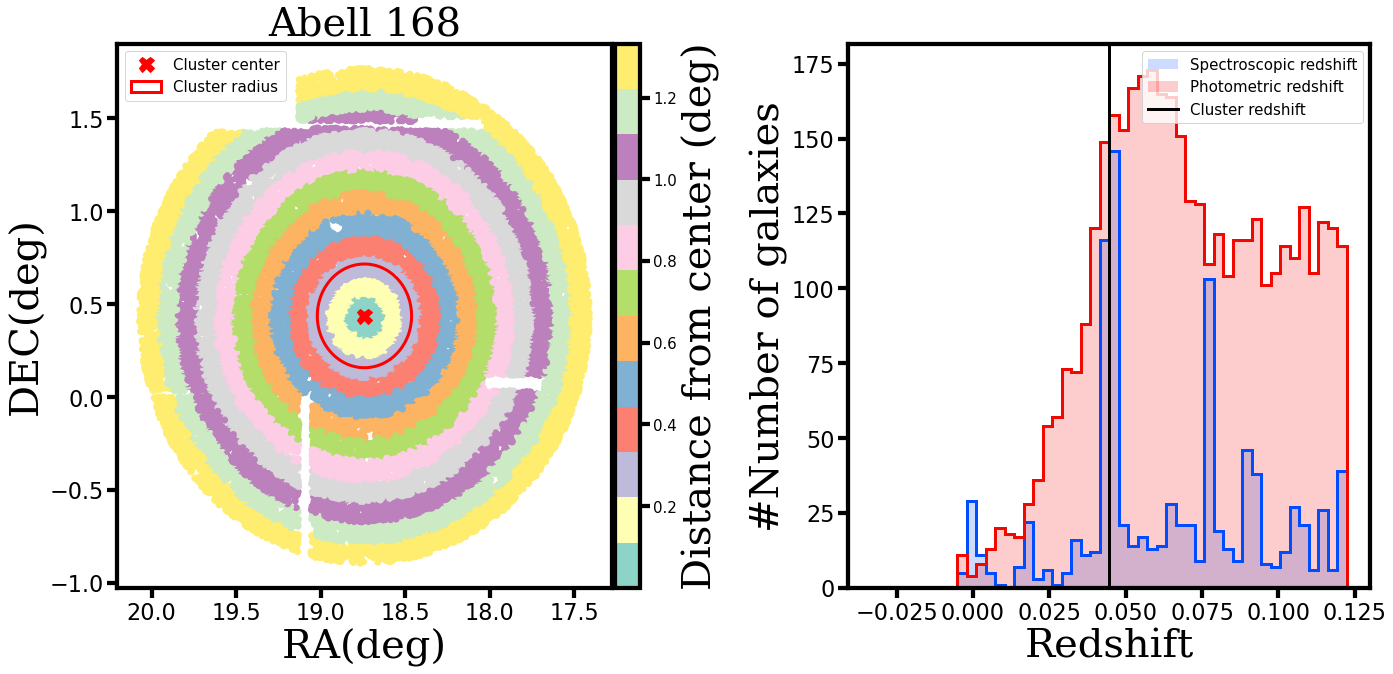

In [183]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
sc1 = ax1.scatter(ra[mask_redshift][mask_cluster], dec[mask_redshift][mask_cluster], 
            marker='o', c=sep_all[mask_cluster], cmap=cm.Set3, rasterized=True)
ax1.plot(ra0, dec0, 'X', color="red", markersize=15, label="Cluster center")
ax1.set_xlabel('RA(deg)',fontdict=font)
ax1.set_ylabel('DEC(deg)',fontdict=font)
ax1.invert_xaxis()
ax1.set_title(cl_names[cluster], fontdict=font)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(sc1, cax=cax1, orientation='vertical')
cbar.set_label(label="Distance from center (deg)", fontdict=font)
cbar.ax.tick_params(labelsize=labelsize)

c0 = SkyCoord(ra=ra0, dec=dec0, frame='icrs', unit='deg')
r = SphericalCircle(c0, radius_cluster*u.deg, resolution=100, vertex_unit='deg', 
            lw=3, label="Cluster radius", edgecolor="red", facecolor="None")
ax1.add_patch(r)

ax1.legend(fontsize=15)


ax2 = fig.add_subplot(122)
ax2.hist(z[mask_redshift_specz][mask_cluster_specz], bins=50, color=colors1[1], histtype='stepfilled',
                 range=[z_lower_specz, z_upper_specz], alpha=0.2, label="Spectroscopic redshift")
ax2.hist(z[mask_redshift_specz][mask_cluster_specz], bins=50, color=colors1[1], histtype='step', lw=3.0,
                 range=[z_lower_specz, z_upper_specz])

ax2.hist(zml[mask_redshift][mask_cluster], bins=50, color=colors1[8], histtype='stepfilled',
                 range=[z_lower_specz, z_upper_specz], alpha=0.2, label="Photometric redshift")
ax2.hist(zml[mask_redshift][mask_cluster], bins=50, color=colors1[8], histtype='step', lw=3.0,
                 range=[z_lower_specz, z_upper_specz])

ax2.set_xlabel('Redshift',fontdict=font)
ax2.set_ylabel('#Number of galaxies',fontdict=font)
ax2.axvline(z_cluster, color="black", lw=3, label="Cluster redshift")

ax2.legend(fontsize=15)


fig.tight_layout(pad=3.0)

# plt.savefig("figures/RA_DEC_zml_distribution_{}.pdf".format(cl_names[cluster]), dpi='figure', format='pdf')

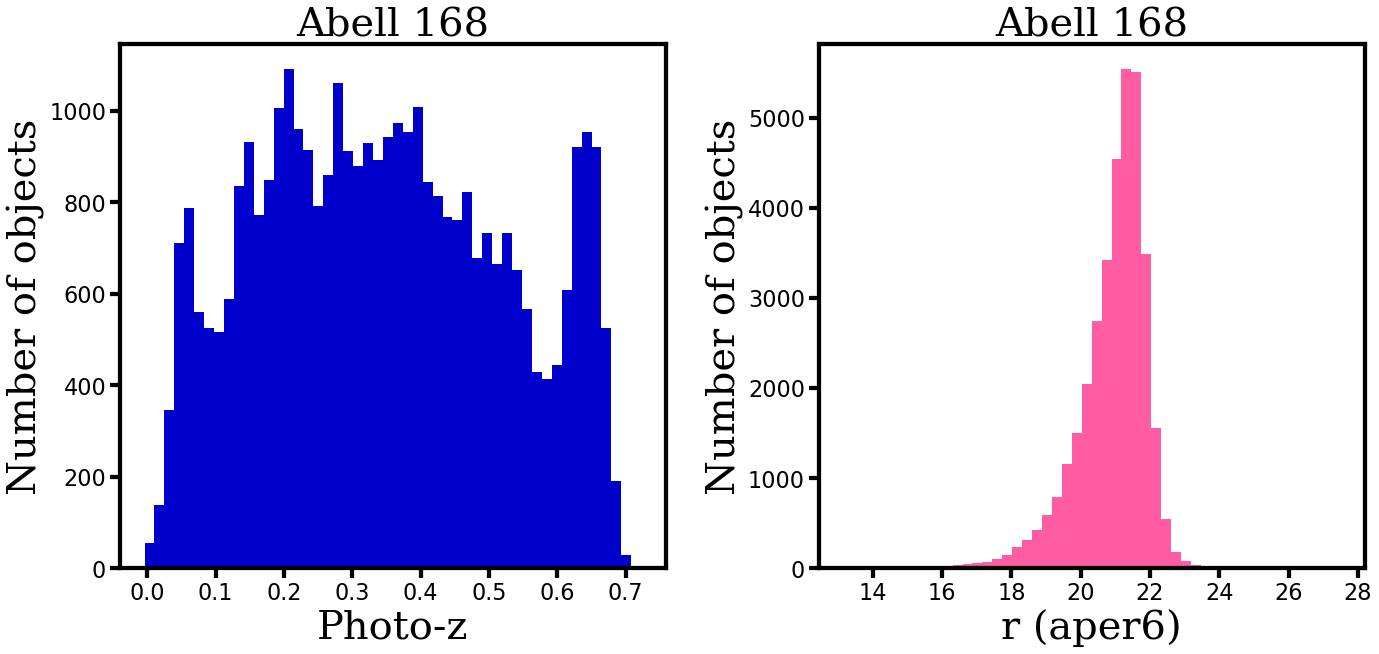

In [184]:
bins = 50

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
ax1.hist(zml, alpha=1.0, bins=bins, histtype='stepfilled', color=colors3[1])
ax1.set_title(cl_names[cluster], fontdict=font)
ax1.set_xlabel("Photo-z", fontdict=font)
ax1.set_ylabel("Number of objects", fontdict=font)


ax2 = fig.add_subplot(122)
ax2.hist(raper6, alpha=1.0, bins=bins, histtype='stepfilled', color=colors3[5])
ax2.set_title(cl_names[cluster], fontdict=font)
ax2.set_xlabel("r (aper6)", fontdict=font)
ax2.set_ylabel("Number of objects", fontdict=font)

fig.tight_layout(pad=4.0)

## Calculate priors -- Old Method

Temos um probleminha aqui:
- Esses são aglomerados de alto redshift, portanto é de se esperar que as magnitudes das galáxias são maiores
- Nós estimamos o sigma_nmad como uma função das magnitudes, e conforme as magnitudes crescem, o sigma_nmad também cresce
- Porém, lá no início eu faço um corte de photo-z = 0.03 ao redor do redshift do aglomerado pra fazer um primeira "limpeza" das galáxias, e eu não ter que ficar lidando com tantos objetos
- Só que com isso, acaba não sobrando nenhuma galáxia com $zml < (z_{C} - f_{field} \sigma_z))\ \text{ou}\ (zml > (z_C + f_{field}\sigma_z))$

In [62]:
#Create a mask to select candidate field galaxies

Rlim = 5*radius_cluster
Ragl = 3*radius_cluster
f_field = 5.0
f_cluster = 3.0

#I think this [mask_cluster] is not needed here, because I am already taking galaxies with sep_all < 5*radius_cluster
mask_field = (sep_all[mask_cluster] > Ragl) & (sep_all[mask_cluster] < Rlim) & ((zml[mask_redshift][mask_cluster] 
            < (z_cluster - f_field*sigma_z)) | (zml[mask_redshift][mask_cluster] > (z_cluster + f_field*sigma_z)))

#### O valor máximo no qual os photo-zs são bons, de acordo com o próprio Erik, é ~0.7
- Isso significa que eu só devo usar galáxias até mais ou menos 0.7 em photo-z
- E principalmente, que eu só vou definir o volume do campo até photo-z 0.7

In [63]:
max_photoz = 0.7
if ((z_cluster - f_field*sigma) > 0) & ((z_cluster + f_field*sigma) < max_photoz): 
    volume_field = np.pi * (Rlim**2 - Ragl**2) * ((z_cluster - f_field*sigma) + 
                                                  (max_photoz - (z_cluster + f_field*sigma)))
    
elif ((z_cluster - f_field*sigma) > 0) & ((z_cluster + f_field*sigma) > max_photoz):
    volume_field = np.pi * (Rlim**2 - Ragl**2) * (z_cluster - f_field*sigma)
    
elif ((z_cluster - f_field*sigma) < 0) & ((z_cluster + f_field*sigma) < max_photoz):
    volume_field = np.pi * (Rlim**2 - Ragl**2) * (max_photoz - (z_cluster + f_field*sigma))
    
elif ((z_cluster - f_field*sigma) < 0) & ((z_cluster + f_field*sigma) > max_photoz):
    volume_field = 0
    
    
n_F = np.sum(mask_field) / volume_field

N_F = n_F * np.pi * Ragl**2 * ((z_cluster + f_cluster*sigma) - (z_cluster - f_cluster*sigma))
print("Number of field galaxies in the region of the cluster by computing first the density n_F: {:.2f}".format(N_F))

Number of field galaxies in the region of the cluster by computing first the density n_F: 0.30


In [64]:
mask_tot = (sep_all[mask_cluster] < Ragl) & ((zml[mask_redshift][mask_cluster] > (z_cluster - f_cluster*sigma)) 
                                        | (zml[mask_redshift][mask_cluster] < (z_cluster + f_cluster*sigma)))
N_tot = np.sum(mask_tot)
print("Total number of galaxies in the region of the cluster: {:.2f}".format(N_tot))

P_ginF = N_F / N_tot
print("Prior P(g in F): {:.2f}".format(P_ginF))

P_ginG = 1 - P_ginF
print("Prior P(g in G): {:.2f}".format(P_ginG))

Total number of galaxies in the region of the cluster: 1440.00
Prior P(g in F): 0.00
Prior P(g in G): 1.00


In [22]:
Pmem = np.zeros(len(zml_specz[mask_redshift_specz][mask_cluster_specz]))
for i in range(len(zml_specz[mask_redshift_specz][mask_cluster_specz])):  
    P_pz_G_i, P_pz_F_i = P_pz(i, z_cluster, pdf_means_specz.T[mask_redshift_specz][mask_cluster_specz], 
                              pdf_weights_specz.T[mask_redshift_specz][mask_cluster_specz],
                              pdf_stds_specz.T[mask_redshift_specz][mask_cluster_specz], sigma_specz)
    Pmem[i] = (P_pz_G_i * P_ginG) / (P_pz_G_i * P_ginG + P_pz_F_i * P_ginF)

/work/Doc/galaxy-cluster-membership/galaxy_cluster_membership.py:181: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  a = 1 / integrate.quad(pdfs_interp, 0.0, 1.0)[0]
/work/Doc/galaxy-cluster-membership/galaxy_cluster_membership.py:192: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  P_pz_G = integrate.quad(lambda x, sigma, zagl: pdf_func(x) * gaussian(x, zagl, sigma), 0.0, zagl + 3*sigma, args=(sigma, zagl))[0]
/work/Doc/galaxy-cluster-membership/galaxy_cluster_me

In [208]:
z_members, id_members = sigma_clipping(z[mask_redshift_specz][mask_cluster_specz], objid_specz[mask_redshift_specz][mask_cluster_specz], z_lower, z_upper, 3.0)
mask_members = np.isin(objid_specz[mask_redshift_specz][mask_cluster_specz], id_members)

In [ ]:
P_pz_G_i_array = np.zeros(len(zml_specz[mask_redshift_specz][mask_cluster_specz]))
P_pz_F_i_array = np.zeros(len(zml_specz[mask_redshift_specz][mask_cluster_specz]))

for i in range(len(zml_specz[mask_redshift_specz][mask_cluster_specz])):  
    P_pz_G_i, P_pz_F_i = P_pz(i, z_cluster, pdf_means_specz.T[mask_redshift_specz][mask_cluster_specz], 
                              pdf_weights_specz.T[mask_redshift_specz][mask_cluster_specz],
                              pdf_stds_specz.T[mask_redshift_specz][mask_cluster_specz], sigma_specz)
    P_pz_G_i_array[i] = P_pz_G_i
    P_pz_F_i_array[i] = P_pz_F_i
    
    
# Pmem = (P_pz_G_i_array * P_ginG) / (P_pz_G_i_array * P_ginG + P_pz_F_i_array * P_ginF)

/work/Doc/galaxy-cluster-membership/galaxy_cluster_membership.py:181: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  a = 1 / integrate.quad(pdfs_interp, 0.0, 1.0)[0]
/work/Doc/galaxy-cluster-membership/galaxy_cluster_membership.py:192: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  P_pz_G = integrate.quad(lambda x, sigma, zagl: pdf_func(x) * gaussian(x, zagl, sigma), 0.0, zagl + 3*sigma, args=(sigma, zagl))[0]
/work/Doc/galaxy-cluster-membership/galaxy_cluster_me

In [205]:
P_ginF = 0.40
P_ginG = 1 - P_ginF

Pmem = (P_pz_G_i_array * P_ginG) / (P_pz_G_i_array * P_ginG + P_pz_F_i_array * P_ginF)

In [206]:
completeness = []
purity = []
d = 0.01
crit = np.arange(0.0, 1.0, d)

for c in crit:
    completeness.append(np.sum((Pmem > c) & mask_members) / np.sum(mask_members))
    purity.append(np.sum(mask_members & (Pmem > c)) / np.sum((Pmem > c)))

/tmp/ipykernel_4428/1530194130.py:8: RuntimeWarning: invalid value encountered in long_scalars
  purity.append(np.sum(mask_members & (Pmem > c)) / np.sum((Pmem > c)))


IndexError: boolean index did not match indexed array along dimension 0; dimension is 3030 but corresponding boolean dimension is 763

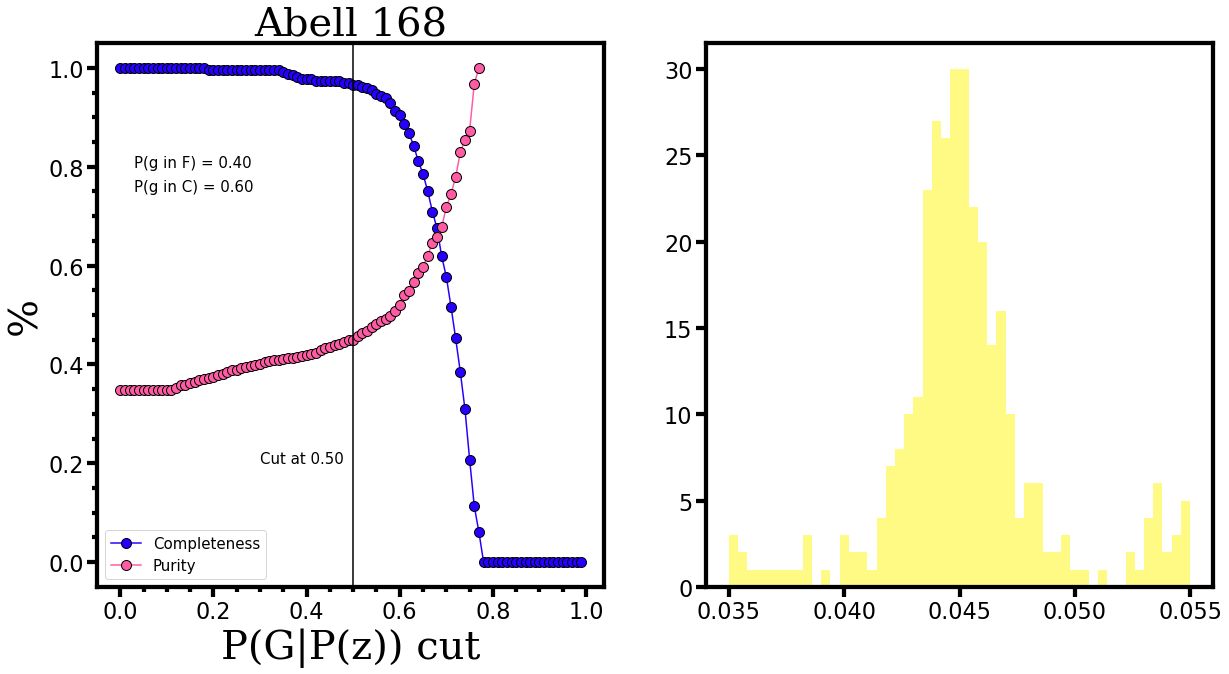

In [207]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
ms = 10
ax1.plot(crit, completeness, marker='o', color=colors3[2], 
         label="Completeness", markersize=ms, markeredgecolor="black")
ax1.plot(crit, purity, marker='o', color=colors3[5], 
         label="Purity", markersize=ms, markeredgecolor="black")

ax1.set_ylabel("%", fontdict=font)
ax1.set_xlabel("P(G|P(z)) cut", fontdict=font)
ax1.set_title(cl_names[cluster], fontdict=font)

ax1.minorticks_on()

lg=plt.legend(fontsize=15)
lg.draw_frame(True)

cut = 0.50
ax1.axvline(cut, color="black")
ax1.text(x=cut-0.2, y=0.2, s="Cut at {:.2f}".format(cut), fontsize=15)
ax1.text(x=0.03, y=0.8, s="P(g in F) = {:.2f}".format(P_ginF), fontsize=15)
ax1.text(x=0.03, y=0.75, s="P(g in C) = {:.2f}".format(P_ginG), fontsize=15)


ax2 = fig.add_subplot(122)
bins = 50
ax2.hist(z[mask_redshift_specz][mask_cluster_specz], alpha=0.5, label='Spec-zs', bins=bins, range=(z_lower, z_upper), 
        histtype='stepfilled', color=colors3[8])
ax2.hist(z[mask_redshift_specz][mask_cluster_specz][Pmem > cut], alpha=1.0, label='Members with Pmem > {:.2f}'.format(cut), 
        bins=bins, range=(z_lower, z_upper), histtype='step', lw=4, color=colors3[4])
ax2.hist(z_members, alpha=1.0, label='Members using sigma clipping'.format(cut), bins=bins, range=(z_lower, z_upper), 
        histtype='step', lw=2, color=colors3[0])

ax2.set_title(cl_names[cluster], fontdict=font)
ax2.set_xlabel("Redshift", fontdict=font)
ax2.set_ylabel("Number of objects", fontdict=font)

ax2.tick_params(axis='x', labelsize=18)

lg=plt.legend(fontsize=15)
lg.draw_frame(True)

fig.tight_layout(pad=4.0)

# c_best = 0.88
# ax1.axhline(c_best, color="black", linestyle="dashed")
# ax1.text(0.65, y=c_best+0.01, s="{:.2f}".format(c_best), fontsize=15)

# p_best = 0.63
# ax1.axhline(p_best, color="black", linestyle="dashed")
# ax1.text(0.65, y=p_best+0.01, s="{:.2f}".format(p_best), fontsize=15)


# plt.savefig("figures/RA_DEC_zml_distribution_{}.pdf".format(cl_names[cluster]), dpi='figure', format='pdf')
# plt.savefig("figures/membership_probability_purity_completeness_{}.pdf".format(cl_names[cluster]), dpi='figure', format='pdf')

In [61]:
np.save("clusters-membership/Pmem_specz_{}".format(cl_names[cluster]), Pmem)

## Calculate priors -- New method

We start by dividing the galaxies into bins of redshift and magnitude, and then excluding galaxies in the volume defined by $3 R_{200}$ and $z_G \pm 5 \sigma_{\mathcal{P}}(\bar{m})$

In [189]:
mask_field = ~((sep_all < 3*radius_cluster) & (zml[mask_redshift] > z_cluster - 5*sigma) & (zml[mask_redshift] < z_cluster+5*sigma))

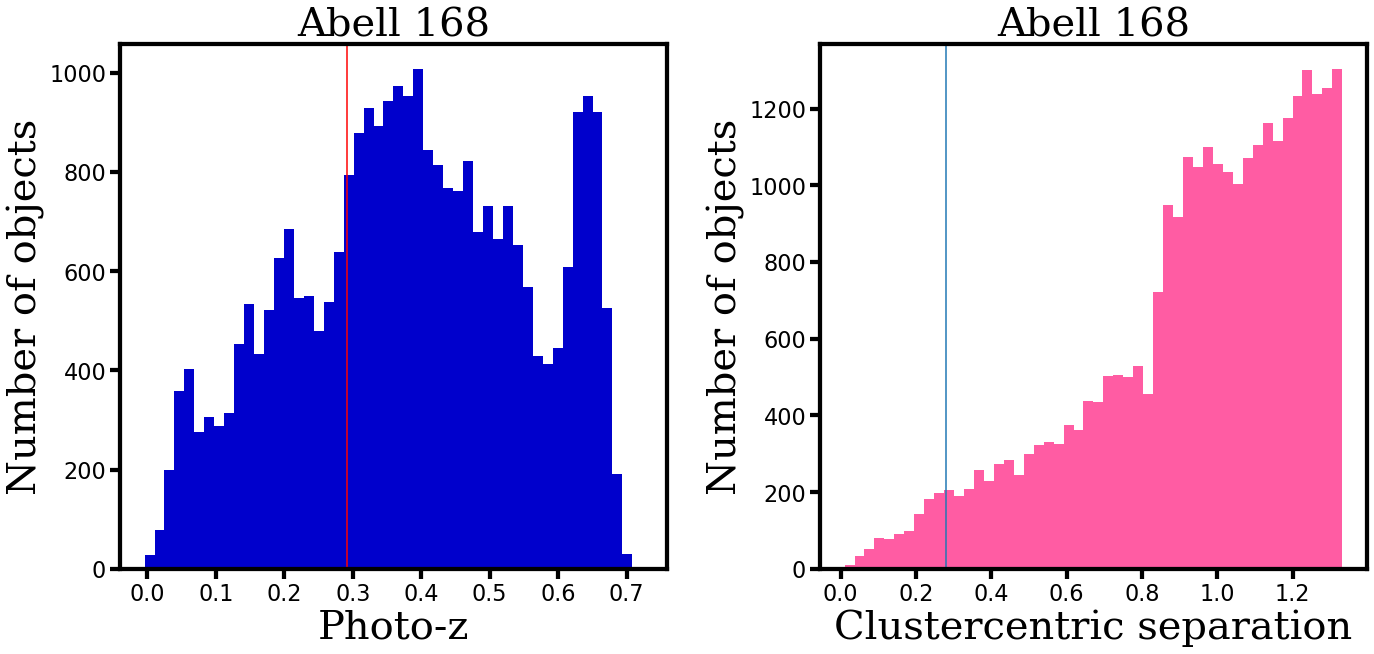

In [201]:
bins = 50

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
ax1.hist(zml[mask_redshift][mask_field], alpha=1.0, bins=bins, histtype='stepfilled', color=colors3[1])
ax1.set_title(cl_names[cluster], fontdict=font)
ax1.set_xlabel("Photo-z", fontdict=font)
ax1.set_ylabel("Number of objects", fontdict=font)
ax1.axvline(z_cluster + 5*sigma, color="red")


ax2 = fig.add_subplot(122)
ax2.hist(sep_all[mask_field], alpha=1.0, bins=bins, histtype='stepfilled', color=colors3[5])
ax2.set_title(cl_names[cluster], fontdict=font)
ax2.set_xlabel("Clustercentric separation", fontdict=font)
ax2.set_ylabel("Number of objects", fontdict=font)
ax2.axvline(radius_cluster)

fig.tight_layout(pad=4.0)

In [192]:
#Tem que ver como usa os pontos desse jeito aí pra interpolar a curva até o redshift do aglomerado
y = np.histogram(zml[mask_redshift][mask_field], range=(0, 0.7), bins=14)[0]
x = np.histogram(zml[mask_redshift][mask_field], range=(0, 0.7), bins=14)[1][:-1] + 0.05/2

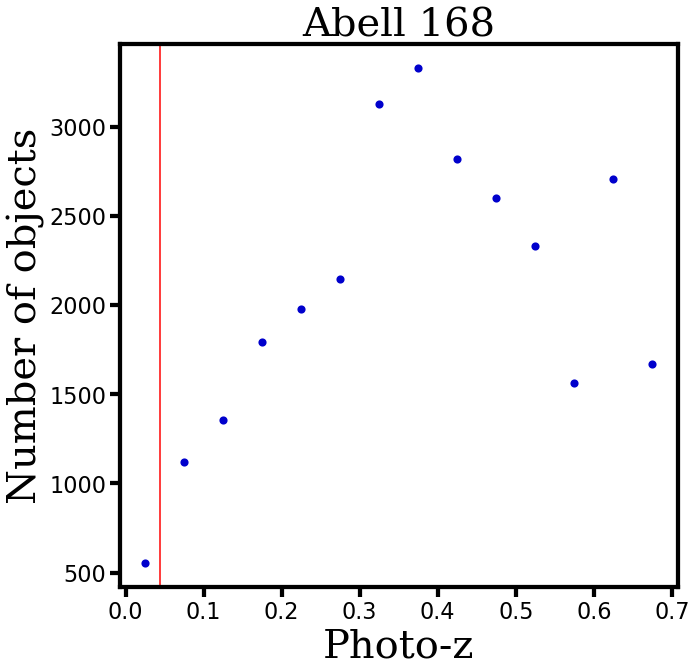

In [204]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, color=colors3[1], lw=5, marker="o", s=10)
ax1.set_title(cl_names[cluster], fontdict=font)
ax1.set_xlabel("Photo-z", fontdict=font)
ax1.set_ylabel("Number of objects", fontdict=font)

ax1.axvline(z_cluster, color="red")

In [ ]:
def priors(rmags, zps, clc_dist, zc, R200):
    
    '''
    rmags : array containing the r magnitude of galaxies in the cluster
    
    zps : array containing the photo-zs of galaxies in the cluster
    
    clc_sep : array containing the clustercentric distances of the objects
    
    zc : redshift of the cluster
    
    R200 : virial radius of the cluster in deg
    '''
    
    dr = 1.0 #width of magnitude bins
    dz = 0.05 #width of photo-z bins
    z_max = 0.7 #maximum range of photo-zs
    
    for r in np.arange(13.0, 22.0, dr):    
        sigma = sigma_nmad(np.mean(rmags[(r_mags > r) & (r_mags < r+dr)]))
        
        if (zc - 5*sigma) > 0: mask_field = (clc_dist > 3*R200) & (zps < (zc - 5*sigma) & (zps > (zc + 5*sigma))
        if (zc - 5*sigma) < 0: mask_field = (clc_dist > 3*R200) & (zps > (zc + 5*sigma))
                                                                   
        
        np.histogram(photozs, range=(0, z_max), bins=z_max/dz)[0]
        
            
    

## Apply membership to all galaxies

Os erros estão muito grandes, e eu acabo selecionando membros em um intervalo muito grande de photo-zs...

In [62]:
Pmem = np.zeros(len(zml[mask_redshift][mask_cluster]))
for i in range(len(zml[mask_redshift][mask_cluster])):  
    P_pz_G_i, P_pz_F_i = P_pz(i, z_cluster, pdf_means.T[mask_redshift][mask_cluster], 
                              pdf_weights.T[mask_redshift][mask_cluster],
                              pdf_stds.T[mask_redshift][mask_cluster], sigma)
    Pmem[i] = (P_pz_G_i * P_ginG) / (P_pz_G_i * P_ginG + P_pz_F_i * P_ginF)

/work/Doc/galaxy-cluster-membership/galaxy_cluster_membership.py:181: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  a = 1 / integrate.quad(pdfs_interp, 0.0, 1.0)[0]
/work/Doc/galaxy-cluster-membership/galaxy_cluster_membership.py:200: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  P_pz_G = integrate.quad(lambda x, sigma, zagl: pdf_func(x) * gaussian(x, zagl, sigma), 0.0, zagl + 3*sigma, args=(sigma, zagl))[0]
/work/Doc/galaxy-cluster-membership/galaxy_cluster_membership.py:201: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  P_pz_F = integrate.quad(lambda x, sigma: pdf_func(x) / (6*sigma), 0.0, zagl + 3*sigma, args=(sigma))[0]
/w

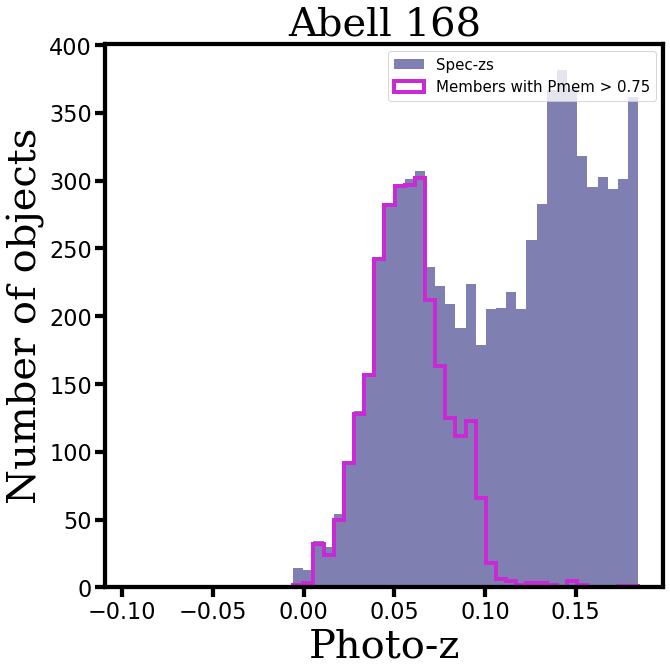

In [71]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

bins = 50
ax.hist(zml[mask_redshift][mask_cluster], alpha=0.5, label='Spec-zs', bins=bins, range=(z_lower, z_upper), 
        histtype='stepfilled', color=colors3[0])
ax.hist(zml[mask_redshift][mask_cluster][Pmem > cut], alpha=1.0, label='Members with Pmem > {:.2f}'.format(cut), 
        bins=bins, range=(z_lower, z_upper), histtype='step', lw=4, color=colors3[4])

ax.set_title(cl_names[cluster], fontdict=font)
ax.set_xlabel("Photo-z", fontdict=font)
ax.set_ylabel("Number of objects", fontdict=font)

lg=plt.legend(fontsize=15)
lg.draw_frame(True)

# plt.savefig("figures/photoz_distribution_membership_{}.png".format(cl_names[cluster]), dpi='figure', format='png')

In [69]:
final_cluster_table = t.loc[np.isin(objid, objid[mask_redshift][mask_cluster])]
final_cluster_table["Pmem"] = Pmem
final_cluster_table.to_csv("clusters-membership/table_membership_{}.csv".format(cl_names[cluster]), index=False)

/tmp/ipykernel_823233/4205020419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cluster_table["Pmem"] = Pmem


### Applying the membership to A168 with photo-zs calculated with PSTotal and ISO apertures